In [1]:
import sys  
!{sys.executable} -m pip install --user matplotlib

ERROR: Can not perform a '--user' install. User site-packages are not visible in this virtualenv.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('bank.csv', sep=';')
df.sample(n=10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,convert
30154,29,technician,married,secondary,no,273,no,no,cellular,4,feb,2775,2,-1,1
13088,55,blue-collar,married,primary,no,137,no,no,telephone,8,jul,377,1,-1,0
11234,32,management,single,tertiary,no,7419,yes,no,unknown,18,jun,248,29,-1,0
37152,46,admin.,divorced,secondary,no,3201,yes,no,telephone,13,may,157,3,-1,0
24991,51,self-employed,divorced,secondary,no,7848,no,no,cellular,18,nov,59,1,-1,0
1313,34,technician,married,secondary,no,65,yes,no,unknown,8,may,63,3,-1,0
30404,47,unemployed,divorced,secondary,no,947,no,no,cellular,5,feb,124,2,-1,0
15680,38,management,single,tertiary,no,-145,yes,no,cellular,21,jul,54,2,-1,0
1323,57,management,married,tertiary,no,2261,yes,no,unknown,8,may,1007,1,-1,0
41559,28,blue-collar,single,secondary,no,322,no,no,telephone,11,sep,240,2,95,1


Стандартный синтаксис создания графика

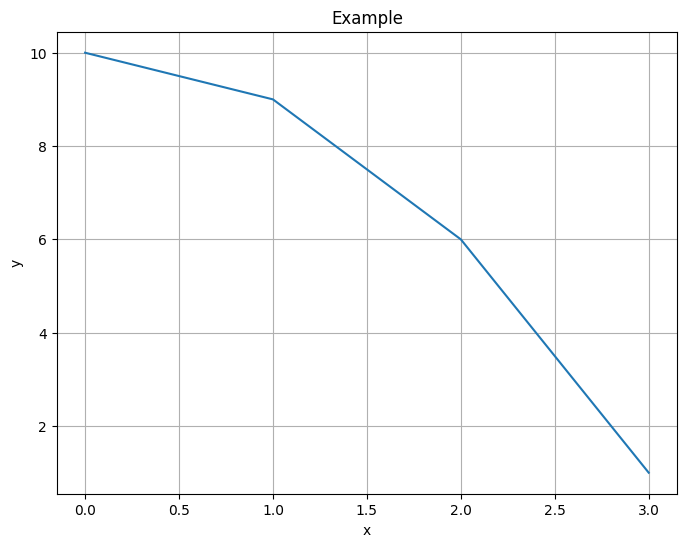

In [5]:
plt.figure(figsize=(8, 6))
plt.plot([0, 1, 2, 3], [10, 9, 6, 1])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Example')
plt.grid();

## Виды графиков
### Линейный график

In [6]:
data = df.groupby('month')['job'].agg(count='count').reset_index().sort_values(by='month')
data.head()

,month,count
0,apr,2932
1,aug,6247
2,dec,214
3,feb,2649
4,jan,1403


### Matplotlib

Text(0, 0.5, 'Кол-во клиентов')

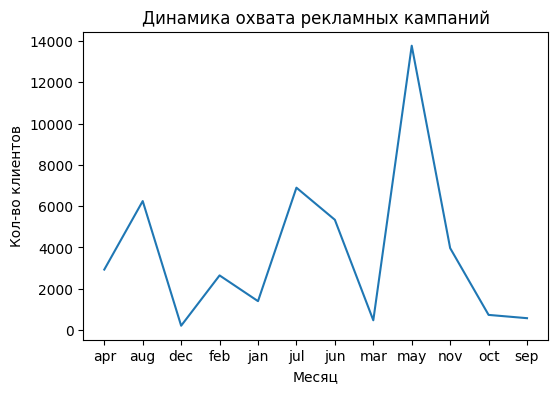

In [8]:
plt.figure(figsize=(6, 4))

plt.plot(data['month'], data['count'])

plt.title('Динамика охвата рекламных кампаний')
plt.xlabel('Месяц')
plt.ylabel('Кол-во клиентов')

### Seaborn

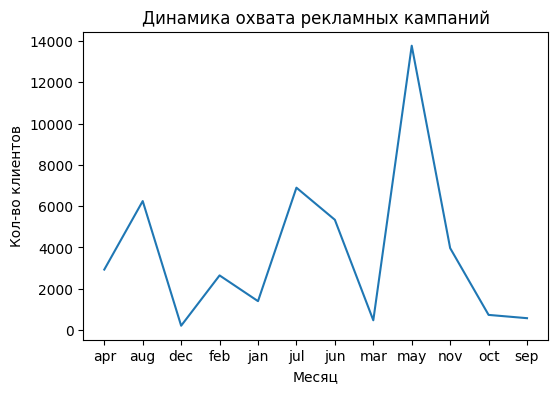

In [9]:
plt.figure(figsize=(6, 4))

sns.lineplot(x=data['month'], y=data['count'])

plt.title('Динамика охвата рекламных кампаний')
plt.xlabel('Месяц')
plt.ylabel('Кол-во клиентов')

## Гистограмма
### Matplotlib

Text(0, 0.5, 'Кол-во клиентов')

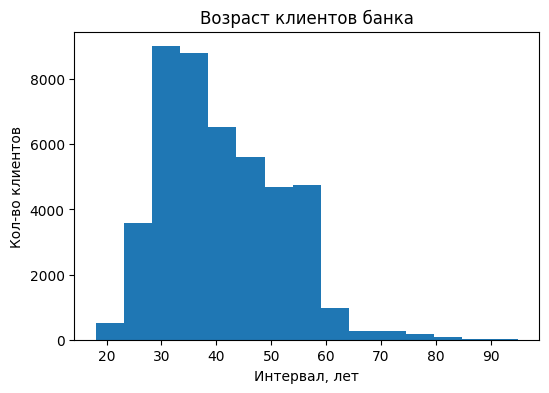

In [10]:
plt.figure(figsize=(6, 4))

plt.hist(df['age'], bins=15)

plt.title('Возраст клиентов банка')
plt.xlabel('Интервал, лет')
plt.ylabel('Кол-во клиентов')

### Seaborn

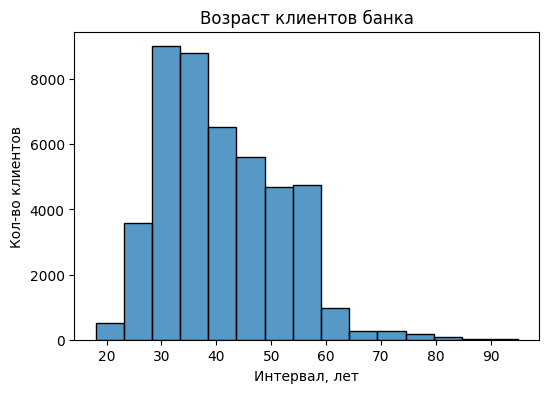

In [11]:
plt.figure(figsize=(6, 4))

sns.histplot(df['age'], bins=15)

plt.title('Возраст клиентов банка')
plt.xlabel('Интервал, лет')
plt.ylabel('Кол-во клиентов');

## Диаграмма рассеяния

In [12]:
# Готовим данные для графика в виде сводной таблицы
data = df.groupby('age')['convert'].sum().reset_index()
data.head()

,age,convert
0,18,7
1,19,11
2,20,15
3,21,22
4,22,40


### Matplotlib

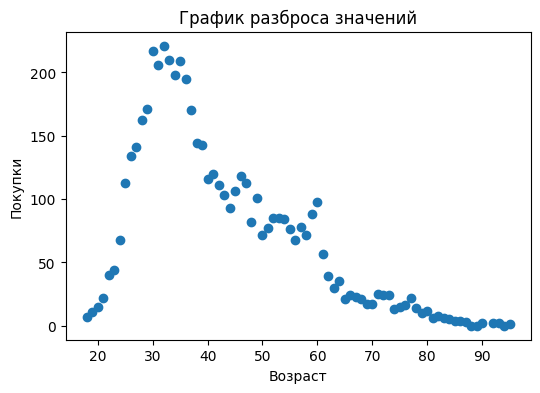

In [13]:
plt.figure(figsize=(6, 4))

plt.scatter(data['age'], data['convert'])

plt.title('График разброса значений')
plt.xlabel('Возраст')
plt.ylabel('Покупки')

### Seaborn

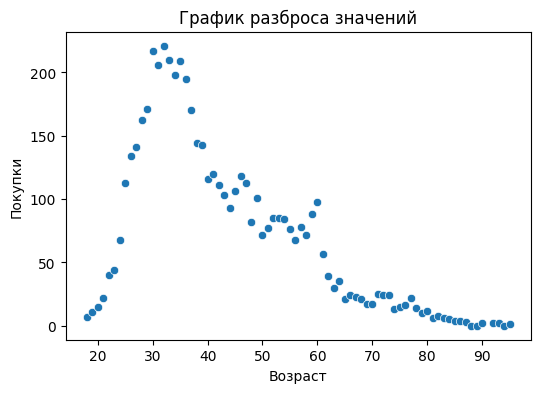

In [15]:
plt.figure(figsize=(6, 4))

sns.scatterplot(x=data['age'], y=data['convert'])

plt.title('График разброса значений')
plt.xlabel('Возраст')
plt.ylabel('Покупки');

## Столбчатые диаграммы

In [16]:
# Готовим данные для графика
data = df['job'].value_counts().reset_index()
data.head()

,job,count
0,blue-collar,9732
1,management,9458
2,technician,7597
3,admin.,5171
4,services,4154


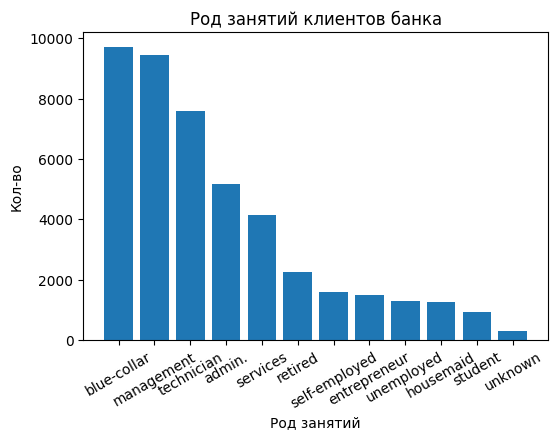

In [19]:
plt.figure(figsize=(6, 4))

plt.bar(data['job'], data['count'])

plt.title('Род занятий клиентов банка')
plt.xlabel('Род занятий')
plt.ylabel('Кол-во')
plt.xticks(rotation=30);

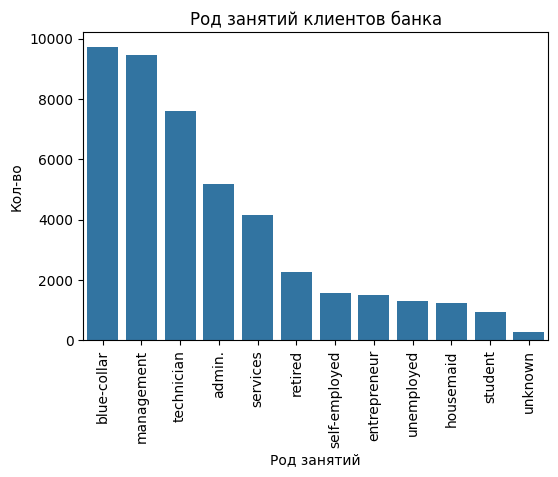

In [22]:
plt.figure(figsize=(6, 4))

sns.barplot(x=data['job'], y=data['count'])

plt.title('Род занятий клиентов банка')
plt.xlabel('Род занятий')
plt.ylabel('Кол-во')
plt.xticks(rotation=90);

## Многорядовые столбчатые диаграммы

In [23]:
# Готовим данные для графика
data = pd.crosstab(df['job'], df['convert']).reset_index().sort_values(by=0, ascending=False)
data.rename(columns={0: 'no', 1: 'yes'}, inplace=True)
data.head()

convert,job,no,yes
1,blue-collar,9024,708
4,management,8157,1301
9,technician,6757,840
0,admin.,4540,631
7,services,3785,369


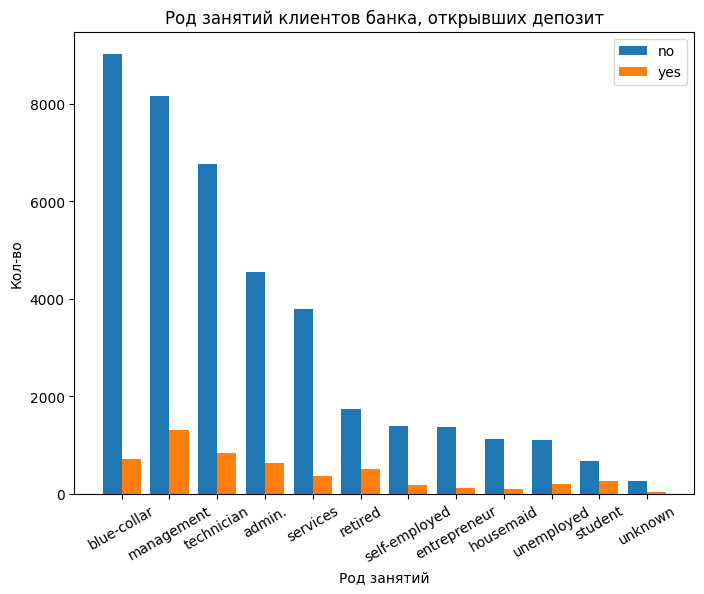

In [24]:
# Строим столбчатую многорядную диаграмму

plt.figure(figsize=(8, 6))

# определяем кол-во делений
n_ticks = np.arange(len(data['no']))

# определяем сдвиг
offset = 0.2

# определяем ширину столбцов
w = 0.4

# добавляем сдвиг к кол-ву делений
plt.bar(n_ticks - offset, data['no'], width=w)
plt.bar(n_ticks + offset, data['yes'], width=w)

plt.title('Род занятий клиентов банка, открывших депозит')
plt.xlabel('Род занятий')
plt.ylabel('Кол-во')
plt.legend(['no', 'yes'])
plt.xticks(n_ticks, data['job'], rotation = 30);  # добавляем метки делений

## Сложенная столбчатая диаграмма

In [25]:
# Готовим данные для графика
data = pd.crosstab(df['job'], df['convert'], normalize='index').reset_index().sort_values(by=0, ascending=False)
data.rename(columns={0: 'no', 1: 'yes'}, inplace=True)
data.head()

convert,job,no,yes
1,blue-collar,0.927250,0.072750
2,entrepreneur,0.917283,0.082717
3,housemaid,0.912097,0.087903
7,services,0.911170,0.088830
9,technician,0.889430,0.110570


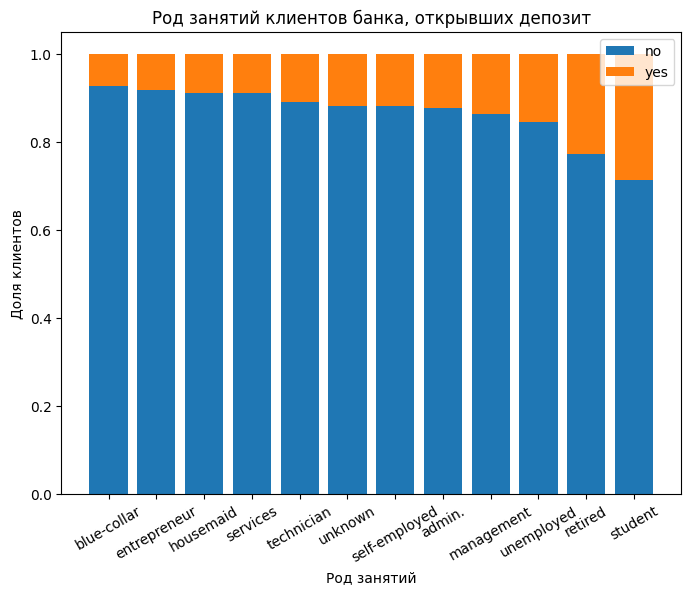

In [26]:
# Строим столбчатую многорядную сложенную диаграмму

plt.figure(figsize=(8, 6))

plt.bar(data['job'], data['no'])
plt.bar(data['job'], data['yes'], bottom=data['no'])

plt.title('Род занятий клиентов банка, открывших депозит')
plt.xlabel('Род занятий')
plt.ylabel('Доля клиентов')
plt.legend(['no', 'yes'])
plt.xticks(rotation = 30);

## Ящики с усами

In [28]:
# Готовим данные для графика
data1 = df['duration'][df['convert'] == 1]
data2 = df['duration'][df['convert'] == 0]
data1.head()

83     1042
86     1467
87     1389
129     579
168     673
Name: duration, dtype: int64

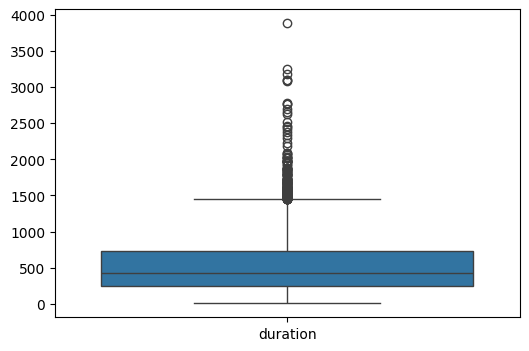

In [29]:
plt.figure(figsize=(6, 4))

sns.boxplot(data=[data1]);

Ящик с усами свершу это гистограмма

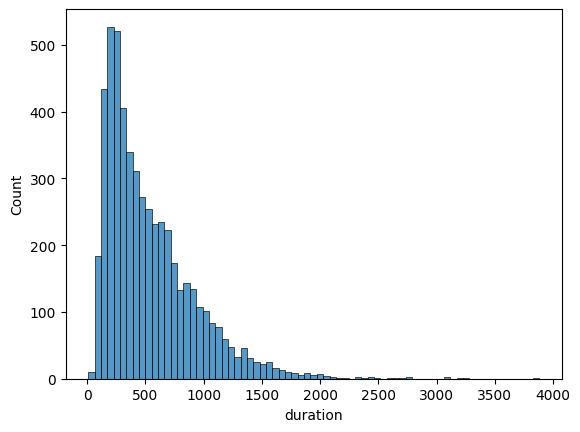

In [30]:
sns.histplot(x=data1);

### Matplotlib

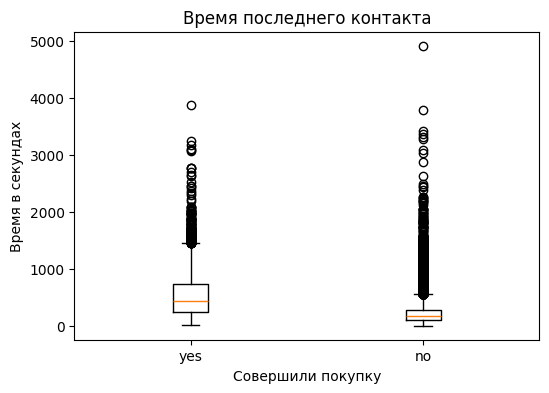

In [31]:
# Строим боксплот

plt.figure(figsize=(6, 4))

plt.boxplot([data1, data2])

plt.title('Время последнего контакта')
plt.xlabel('Совершили покупку')
plt.ylabel('Время в секундах')
plt.xticks([1, 2], ['yes', 'no']);

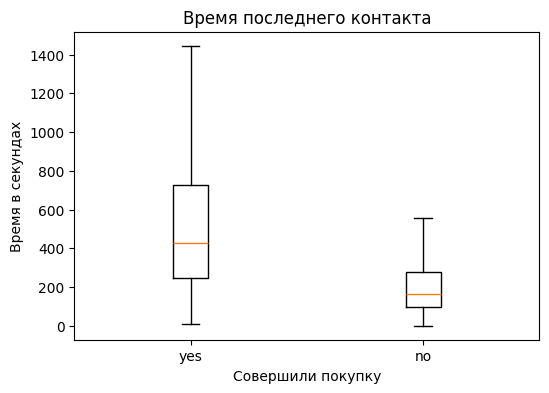

In [32]:
# Строим боксплот без выбросов 

plt.figure(figsize=(6, 4))

plt.boxplot([data1, data2], showfliers=False)

plt.title('Время последнего контакта')
plt.xlabel('Совершили покупку')

plt.ylabel('Время в секундах')
plt.xticks([1, 2], ['yes', 'no']);

### Seaborn

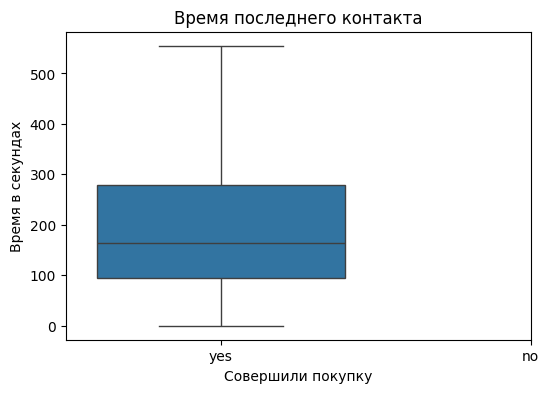

In [35]:
# Строим боксплот без выбросов 

plt.figure(figsize=(6, 4))

sns.boxplot(data=[data1, data2], showfliers=False)

plt.title('Время последнего контакта')
plt.xlabel('Совершили покупку')

plt.ylabel('Время в секундах')
plt.xticks([0, 1], ['yes', 'no']);

## Круговая диаграмма

In [36]:
# Готовим данные для графика
data = df['convert'].value_counts()
data.index = ['no', 'yes']
data.head()

no     39922
yes     5289
Name: count, dtype: int64

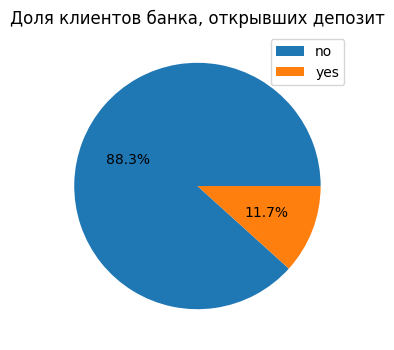

In [37]:
# Строим круговую диаграмму

plt.figure(figsize=(6, 4))

plt.pie(data, autopct='%1.1f%%')

plt.title('Доля клиентов банка, открывших депозит')
plt.legend(data.index);

## Визуальный анализ данных
#### Описание датасета

Статистические данные о ряде домов в Калифорнии, основанные на переписи 1990 года.

* longitude - долгота
* latitude - широта
* housing_median_age - средний возраст дома
* total_rooms - общее количество комнат
* total_bedrooms - общее количество спален
* population - количество проживающих
* households - домохозяйства
* ocean_proximity - близость океана
* median_income - средний доход
* median_house_value - средняя стоимость дома

In [39]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [40]:
df['ocean_proximity']='NEAR BAY'
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,NEAR BAY
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,NEAR BAY
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,NEAR BAY
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0,NEAR BAY
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0,NEAR BAY


### Распределение вещественных признаков

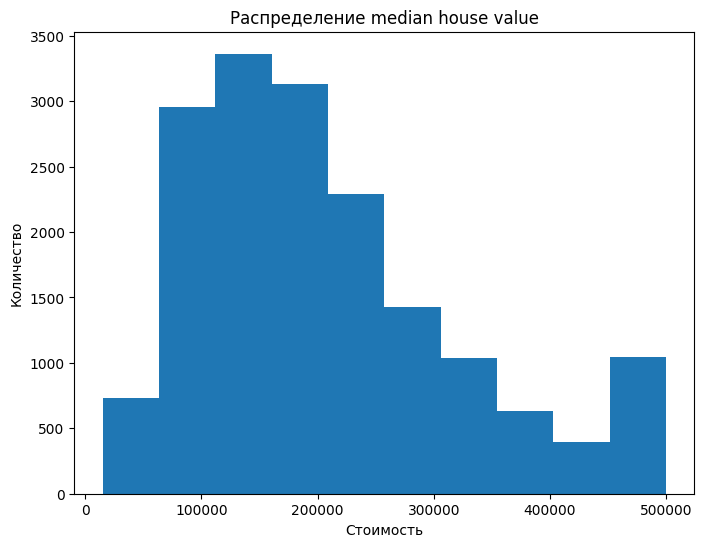

In [41]:
# {'red', 'green', 'blue'} - дискретный признак ('red', 'green', 'blue', 'red', 'green', 'red')
# [0, 100] - вещественный признак (0, 5, 5.6, 10.5, 10.57)
plt.figure(figsize=(8, 6))
plt.hist(df['median_house_value'])
plt.title('Распределение median house value')
plt.xlabel('Стоимость')
plt.ylabel('Количество');

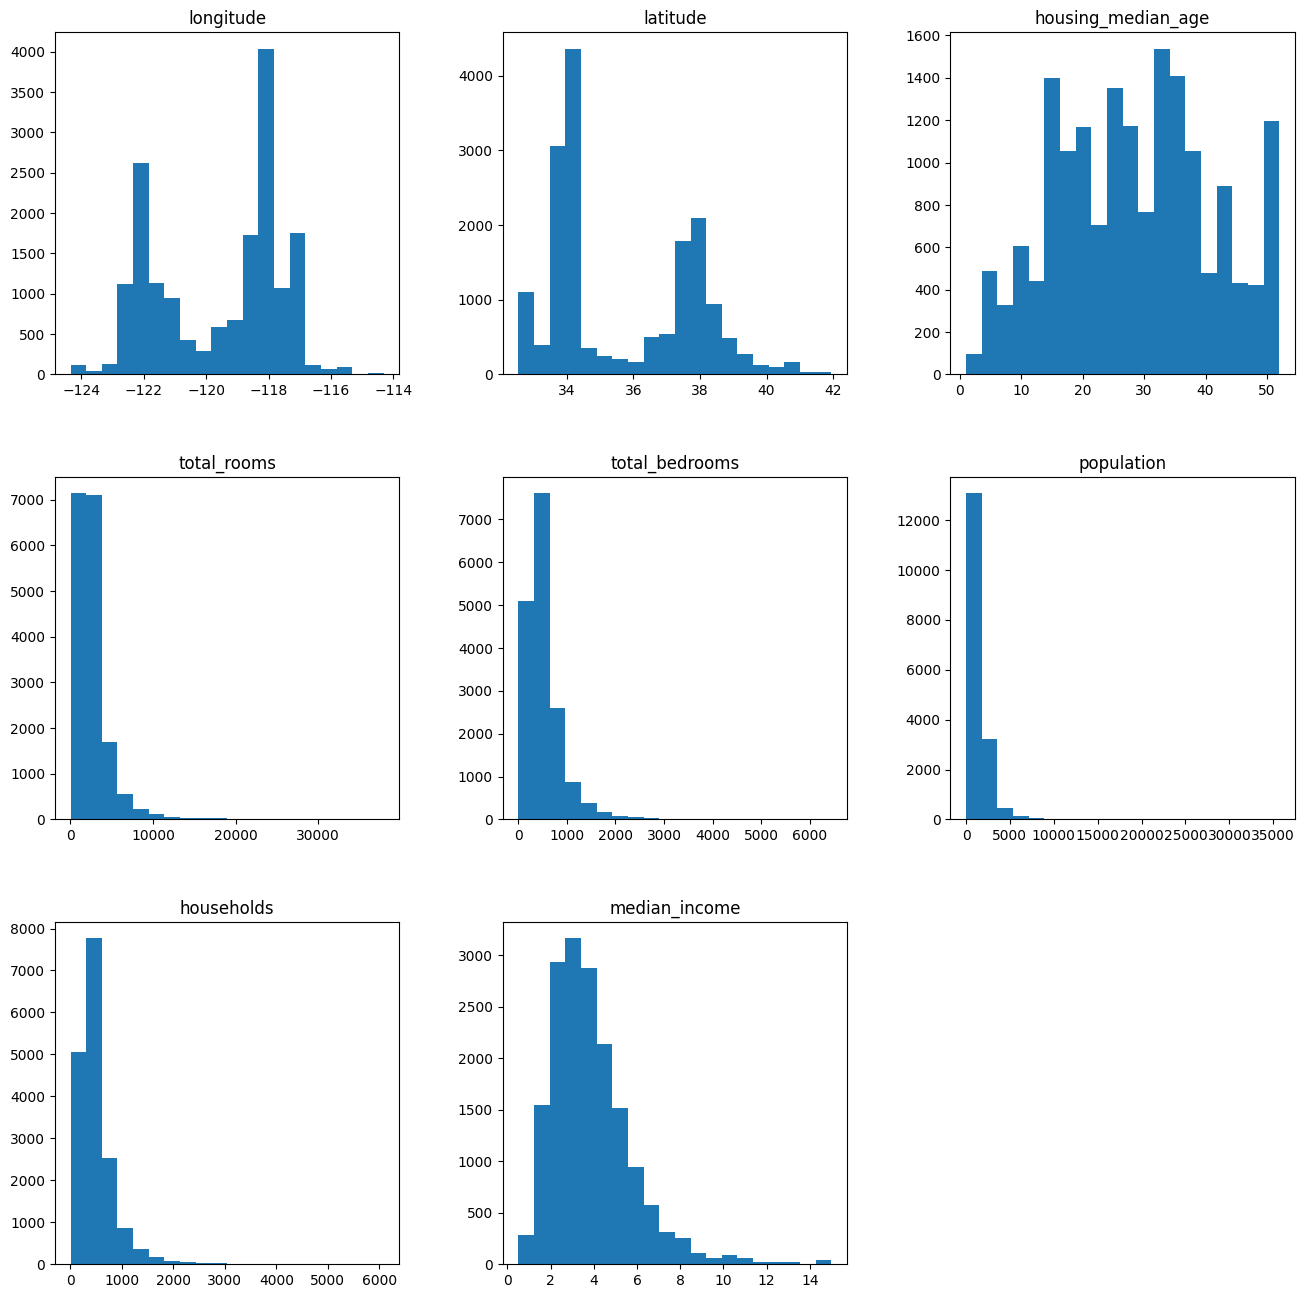

In [42]:
df_num_features = df.select_dtypes(include=['float64', 'float32', 'float16'])
df_num_features.drop('median_house_value', axis=1, inplace=True)
df_num_features.hist(figsize=(16, 16), bins=20, grid=False);

### Поиск выбросов с помощью box plot

Как строится box plot

Подробное объяснение

box - от 25% до 75% квантиля
линия в середине box - медиана
"усы"
Как строятся "усы" - вариантов масса

среднее +/- 3 сигма (стандартное отклонение)
min / max
median +/- 1.5*(q75 - q25),
...
*Интерквартильный размах = q75 - q25

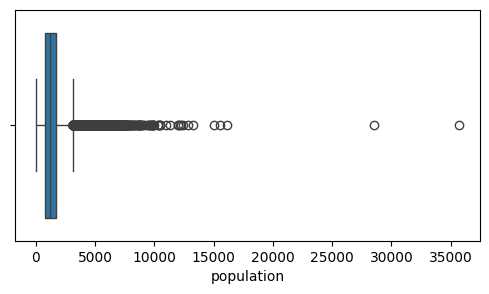

In [43]:
plt.figure(figsize=(6, 3))

sns.boxplot(x=df['population'], whis=1.5)

plt.xlabel('population')
plt.show()

### Анализ категориальных признаков

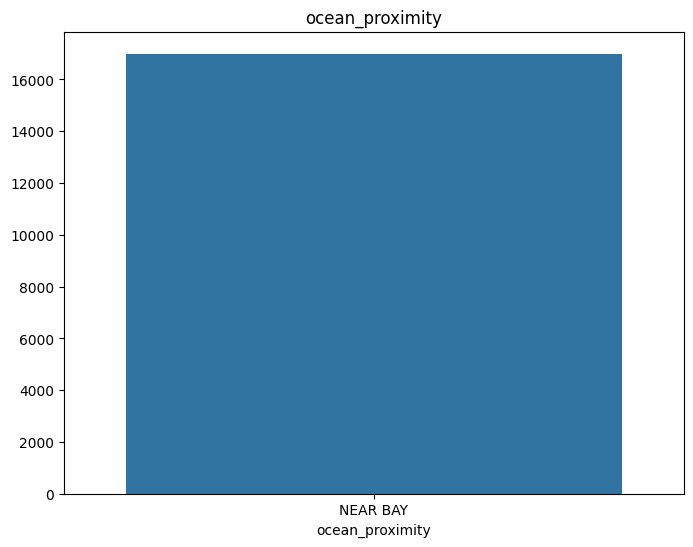

In [44]:
counts = df['ocean_proximity'].value_counts()
    
plt.figure(figsize=(8, 6))    
plt.title('ocean_proximity')
sns.barplot(x=counts.index, y=counts.values)
    
plt.show()

In [46]:
# counts = df['INLAND'].value_counts()
    
# plt.figure(figsize=(8, 6))    
# plt.title('INLAND')
# sns.barplot(x=counts.index, y=counts.values)
    
# plt.show()

### Анализ взаимных распределений

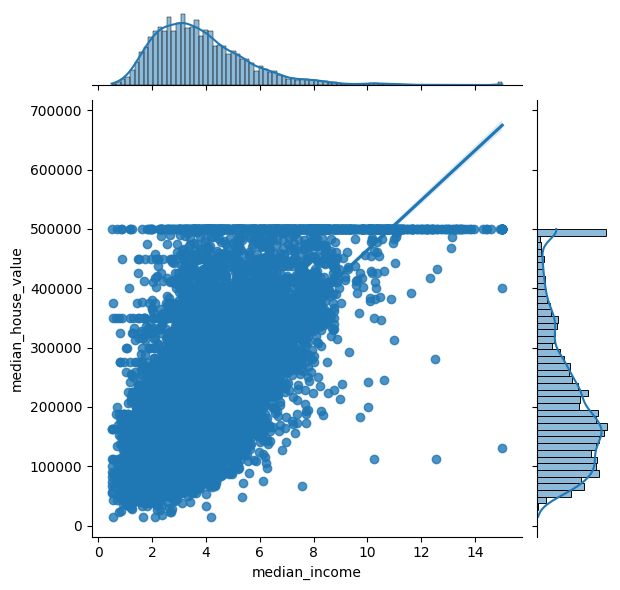

In [47]:
sns.jointplot(x=df['median_income'], y=df['median_house_value'], kind='reg');

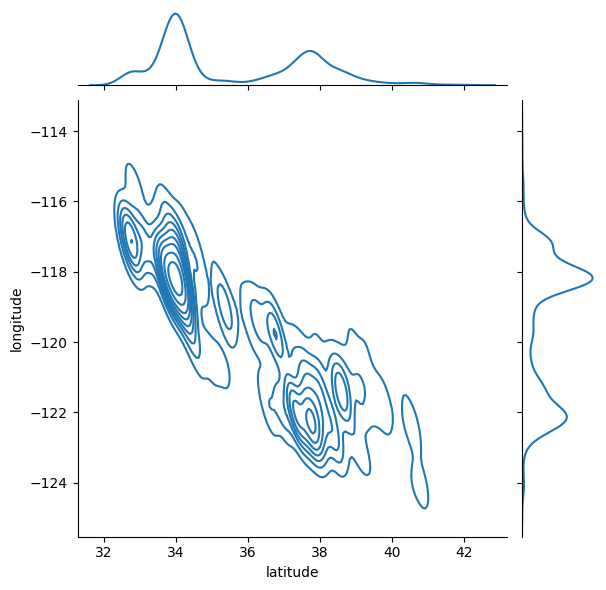

In [48]:
sns.jointplot(x=df['latitude'], y=df['longitude'], kind='kde');

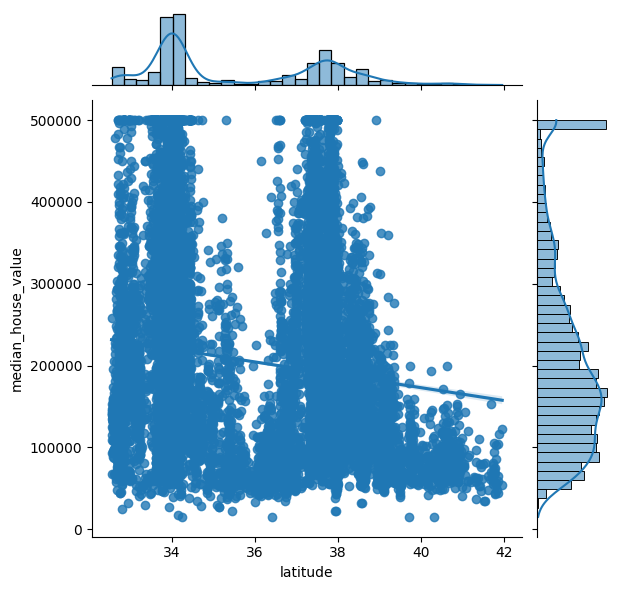

In [49]:
sns.jointplot(x=df['latitude'], y=df['median_house_value'], kind='reg');

Видно два города, имеет смысл посмотреть на зависимость по отдельности

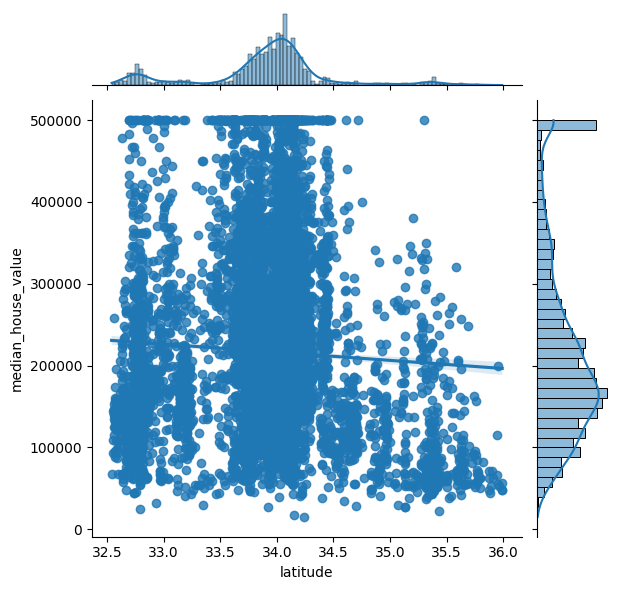

In [50]:
df_cut = df[df['latitude'] < 36]
sns.jointplot(x=df_cut['latitude'], y=df_cut['median_house_value'], kind='reg');

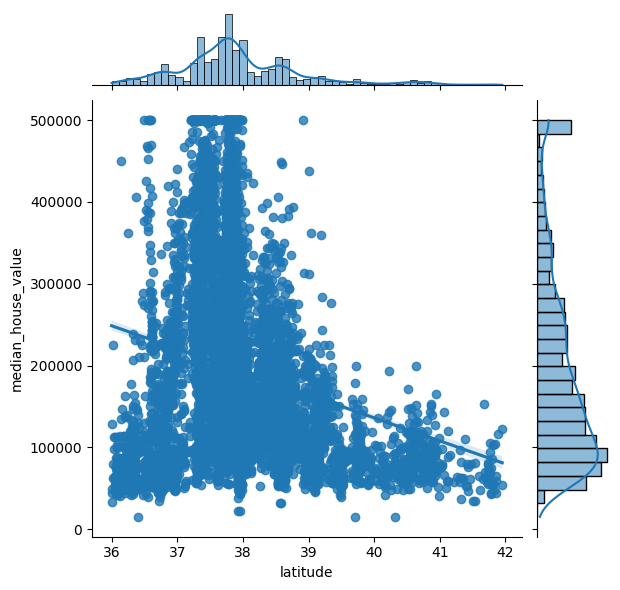

In [51]:
df_cut = df[df['latitude'] >= 36]
sns.jointplot(x=df_cut['latitude'], y=df_cut['median_house_value'], kind='reg');

### Категориальные / бинарные признаки
### box plot

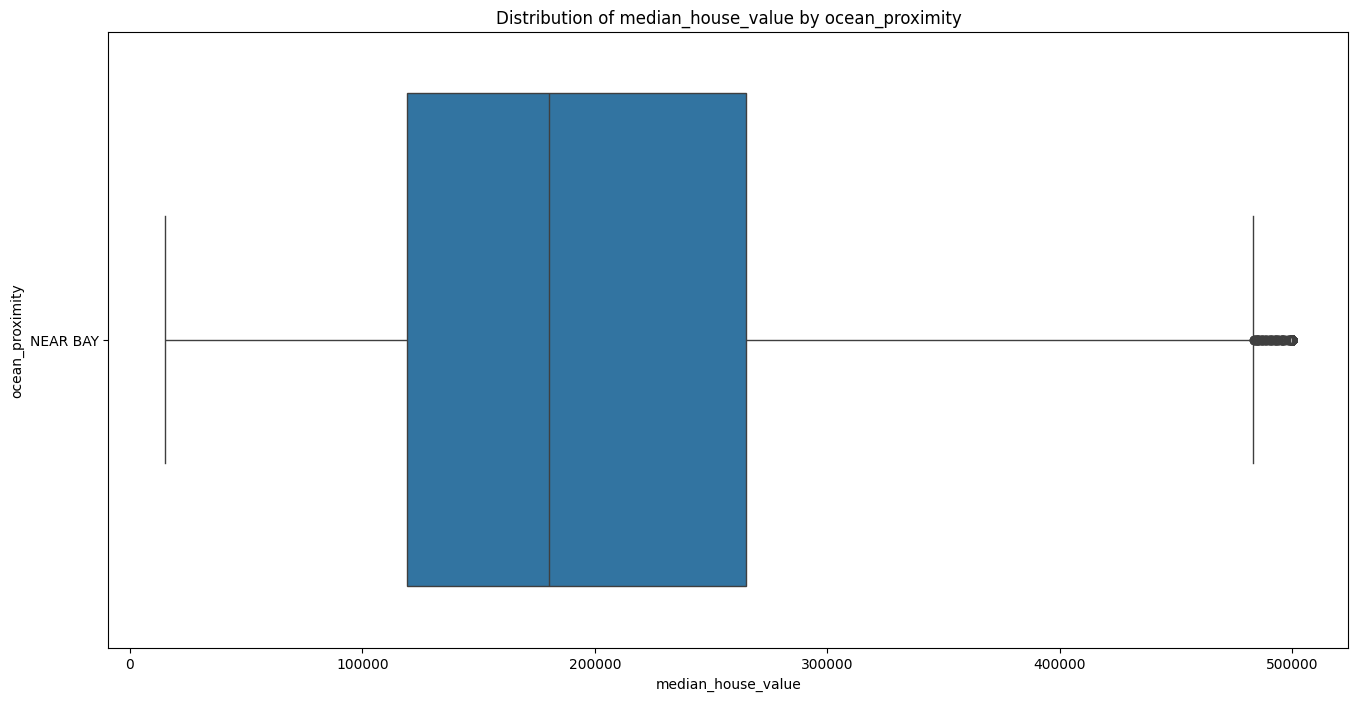

In [56]:
plt.figure(figsize=(16, 8))

sns.boxplot(x=df['median_house_value'], y=df['ocean_proximity'], whis=1.5)

plt.xlabel('median_house_value')
plt.ylabel('ocean_proximity')
plt.title('Distribution of median_house_value by ocean_proximity');

### Как строится box plot

Подробное объяснение

box - от 25% до 75% квантиля
линия в середине box - медиана
"усы"
### Как строятся "усы" - вариантов масса

среднее +/- 3 сигма (стандартное отклонение)
min / max
median +/- 1.5*(q75 - q25),
...
*Интерквартильный размах = q75 - q25

## Матрица корреляций
Показывает линейную связь между переменными
Изменяется от -1 до 1
Корреляция - мера только линейной связи

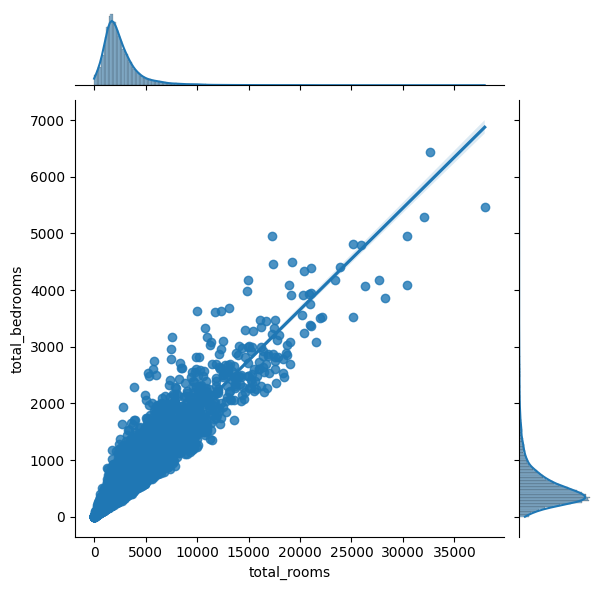

In [57]:
sns.jointplot(x=df['total_rooms'], y=df['total_bedrooms'], kind='reg');

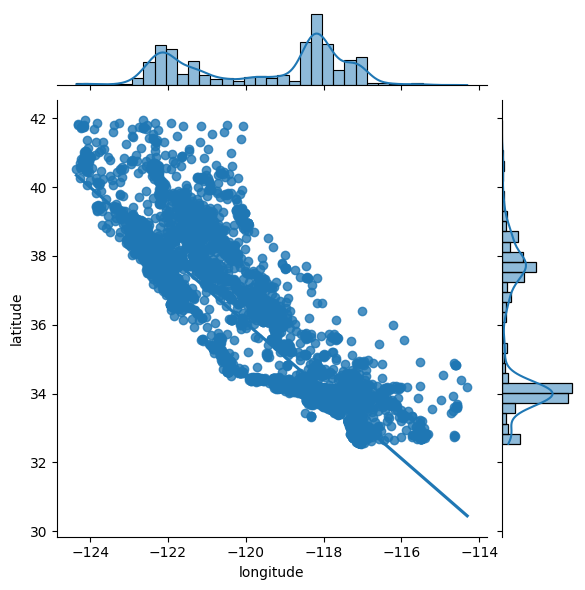

In [58]:
sns.jointplot(x=df['longitude'], y=df['latitude'], kind='reg');

In [63]:
df.drop('ocean_proximity',axis=1,inplace=True)

In [65]:
corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.0,-0.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0
latitude,-0.9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
housing_median_age,0.0,0.0,1.0,-0.4,-0.3,-0.3,-0.3,0.0,0.0
total_rooms,0.0,0.0,-0.4,1.0,0.9,0.9,0.9,0.0,0.0
total_bedrooms,0.0,0.0,-0.3,0.9,1.0,0.9,1.0,0.0,0.0
population,0.0,0.0,-0.3,0.9,0.9,1.0,0.9,0.0,0.0
households,0.0,0.0,-0.3,0.9,1.0,0.9,1.0,0.0,0.0
median_income,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.7
median_house_value,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7,1.0


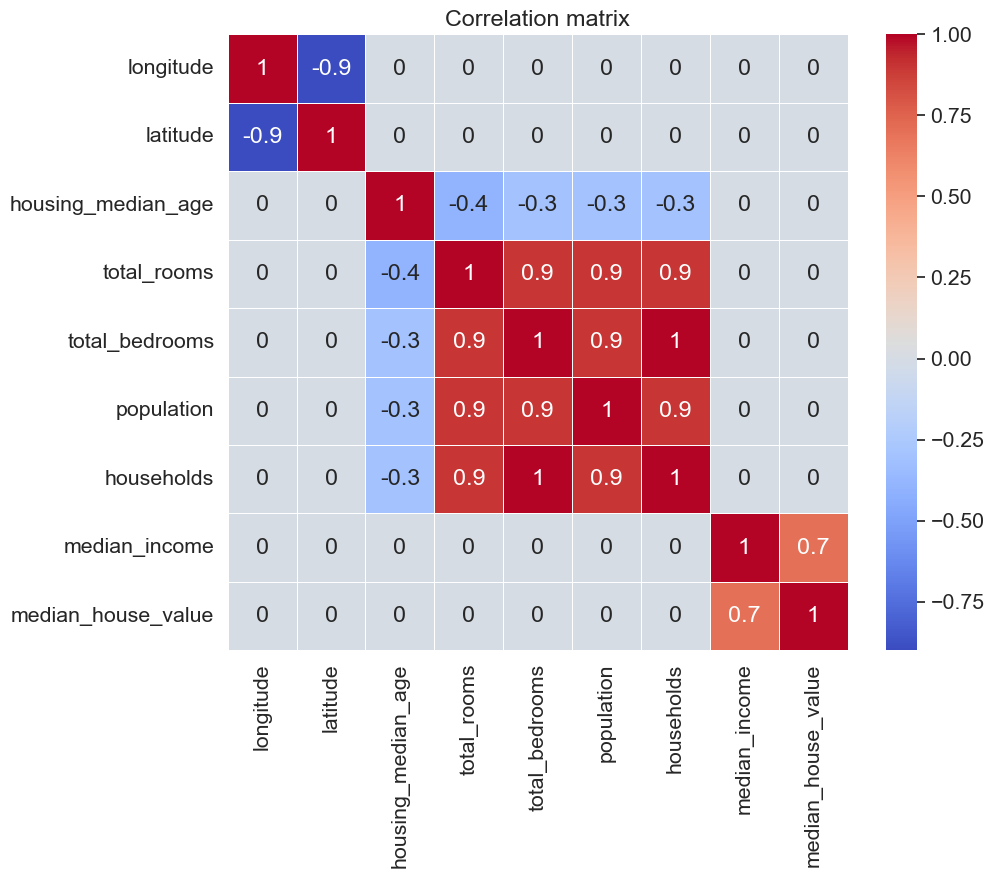

In [66]:
plt.figure(figsize=(10, 8))

sns.set(font_scale=1.4)

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix');

## Отрисовка на карте

In [ ]:
min_long = -124.55
max_long = -113.80

min_lat = 32.45
max_lat = 42.05
import matplotlib.image as img
california_map = img.imread('California_Map.png')

plt.figure(figsize=(12, 9))

sc = plt.scatter(df['longitude'], df['latitude'], alpha=0.5, c=df['median_house_value'])

plt.imshow(california_map, extent=[min_long, max_long, min_lat, max_lat], alpha=0.5)

plt.colorbar(sc)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Homes geography");

### Folium

In [ ]:
import folium
this_map = folium.Map(prefer_canvas=True)

def plotDot(point):
    folium.CircleMarker(
        location=[point.latitude, point.longitude],
        radius=2,
        popup=point.median_house_value
    ).add_to(this_map)
    
df.apply(plotDot, axis=1)

this_map.fit_bounds(this_map.get_bounds())

this_map

### Kepler** 
Создание интерактивной карты в отдельном html документе

In [ ]:
# !conda install -c conda-forge keplergl
# !pip install keplergl==0.1.1
from keplergl import KeplerGl 

map_ = KeplerGl(height=700)
map_.add_data(df, 'Data')
map_.save_to_html(file_name='./california.html')